In [2]:
import matplotlib

In [3]:
from plotly.graph_objs import *

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
import plotly.graph_objs as go

In [9]:
import plotly.plotly as py

In [10]:
import datetime, requests

In [11]:
url_plantilla_Serie = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{codigo}?nult={num_datos}'

In [12]:
url_plantilla_Tabla= 'http://servicios.ine.es/wstempus/js/ES/DATOS_TABLA/{codigo}?nult={num_datos}'

# Primero importamos los datos

In [13]:
codigo = "9663"

In [14]:
num_datos=100

In [15]:
url = url_plantilla_Tabla.format(codigo=codigo,num_datos=num_datos)

In [20]:
respuesta_poblacion_16 = requests.get(url)

In [21]:
datos_poblacion_16=pd.DataFrame(respuesta_poblacion_16.json())

In [22]:
datos_poblacion_16.drop([0,1,2,318,319,320],inplace=True)

In [23]:
spliteador_edad = lambda x: x.split('.')[1].split()[0]

In [24]:
spliteador_genero=lambda x: x.split('.')[2].strip()

In [25]:
spliteador_edad_genero=lambda x: [x.split('.')[1].split()[0],x.split('.')[2].strip()]

In [26]:
df1=datos_poblacion_16[datos_poblacion_16['Nombre'].apply(spliteador_genero)!='Total']

In [27]:
df1.loc[[4]]['Data'].values[0]

[{'Anyo': 2017,
  'FK_Periodo': 26,
  'FK_TipoDato': 2,
  'Fecha': 1483225200000,
  'Secreto': False,
  'Valor': 209617.0},
 {'Anyo': 2016,
  'FK_Periodo': 27,
  'FK_TipoDato': 2,
  'Fecha': 1467324000000,
  'Secreto': False,
  'Valor': 210958.0},
 {'Anyo': 2016,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1451602800000,
  'Secreto': False,
  'Valor': 215948.0},
 {'Anyo': 2015,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1435701600000,
  'Secreto': False,
  'Valor': 215729.0},
 {'Anyo': 2015,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1420066800000,
  'Secreto': False,
  'Valor': 220124.0},
 {'Anyo': 2014,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1404165600000,
  'Secreto': False,
  'Valor': 216744.0},
 {'Anyo': 2014,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1388530800000,
  'Secreto': False,
  'Valor': 218576.0},
 {'Anyo': 2013,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1372629600000,
  'Secreto': False,
  'Valor': 223136.0},
 {'Anyo'

In [28]:
dict_poblacion_16=[[df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0],int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']]
                   for x in df1.index for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [29]:
trama=pd.DataFrame(dict_poblacion_16,columns=['Genero','Edad','Poblacion'])

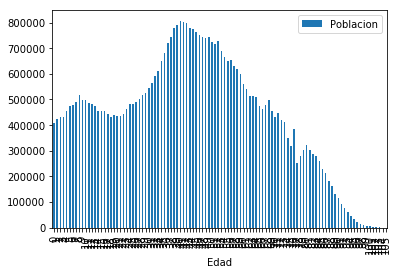

In [30]:
trama.groupby('Edad')[['Poblacion']].sum().plot.bar()

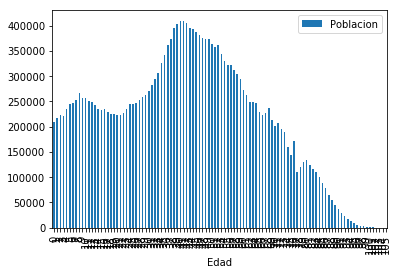

In [31]:
trama[trama['Genero']=='Hombres'].groupby('Edad')[['Poblacion']].sum().plot.bar()

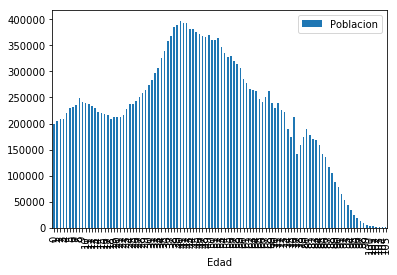

In [32]:
trama[trama['Genero']=='Mujeres'].groupby(['Edad'])[['Poblacion']].sum().plot.bar()

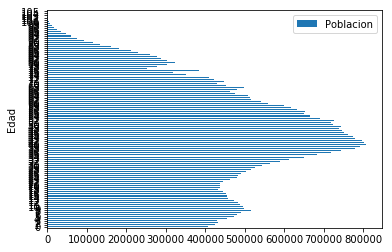

In [33]:
trama.groupby(['Edad'])[['Poblacion']].sum().plot.barh()


In [34]:
dict_hombres=[[int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']] 
for x in df1.index if df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]=='Hombres' 
for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [35]:
dict_mujeres=[[int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']] 
for x in df1.index if df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]=='Mujeres' 
for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [36]:
panda_hombres=pd.DataFrame(dict_hombres,columns=['Edad','Hombres'])
panda_mujeres=pd.DataFrame(dict_mujeres,columns=['Edad','Mujeres'])

In [37]:
panda_poblacion=pd.merge(panda_hombres,panda_mujeres,on='Edad')

In [38]:
print (panda_poblacion.values)

[[  0.00000000e+00   2.09617000e+05   1.98177000e+05]
 [  1.00000000e+00   2.18078000e+05   2.05503000e+05]
 [  2.00000000e+00   2.22981000e+05   2.09052000e+05]
 [  3.00000000e+00   2.21075000e+05   2.08665000e+05]
 [  4.00000000e+00   2.34704000e+05   2.20532000e+05]
 [  5.00000000e+00   2.44405000e+05   2.29566000e+05]
 [  6.00000000e+00   2.47158000e+05   2.32215000e+05]
 [  7.00000000e+00   2.53140000e+05   2.36473000e+05]
 [  8.00000000e+00   2.66650000e+05   2.49693000e+05]
 [  9.00000000e+00   2.57660000e+05   2.41446000e+05]
 [  1.00000000e+01   2.56299000e+05   2.40133000e+05]
 [  1.10000000e+01   2.50339000e+05   2.36623000e+05]
 [  1.20000000e+01   2.48383000e+05   2.33400000e+05]
 [  1.30000000e+01   2.43341000e+05   2.30609000e+05]
 [  1.40000000e+01   2.34908000e+05   2.21633000e+05]
 [  1.50000000e+01   2.33100000e+05   2.21068000e+05]
 [  1.60000000e+01   2.34621000e+05   2.19090000e+05]
 [  1.70000000e+01   2.28314000e+05   2.15630000e+05]
 [  1.80000000e+01   2.24100

In [39]:
panda_poblacion['Edad']

0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10      10
11      11
12      12
13      13
14      14
15      15
16      16
17      17
18      18
19      19
20      20
21      21
22      22
23      23
24      24
25      25
26      26
27      27
28      28
29      29
      ... 
76      76
77      77
78      78
79      79
80      80
81      81
82      82
83      83
84      84
85      85
86      86
87      87
88      88
89      89
90      90
91      91
92      92
93      93
94      94
95      95
96      96
97      97
98      98
99      99
100    100
101    101
102    102
103    103
104    104
105    105
Name: Edad, Length: 106, dtype: int64

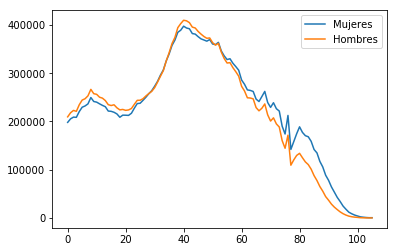

In [40]:
plt.plot(panda_poblacion['Edad'],panda_poblacion['Mujeres'],
         panda_poblacion['Edad'],panda_poblacion['Hombres'])
plt.legend(['Mujeres','Hombres'])

([<matplotlib.axis.XTick at 0x11b090400>,
 <a list of 11 Text xticklabel objects>)

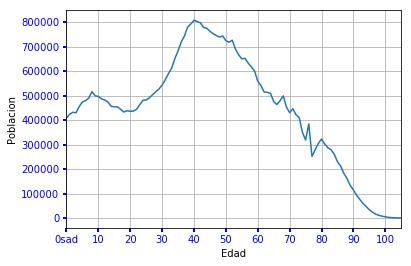

In [41]:
plt.plot(panda_poblacion['Edad'],panda_poblacion['Hombres']+panda_poblacion['Mujeres'])
plt.locator_params(axis='x',nbins=25)
plt.xlim([0,105])
plt.tick_params(colors='b',width='2')
plt.xlabel('Edad')
plt.ylabel('Poblacion')
plt.grid()
plt.xticks([0,10,20,30,40,50,60,70,80,90,100],['0sad','10','20','30','40','50','60','70','80','90','100'])

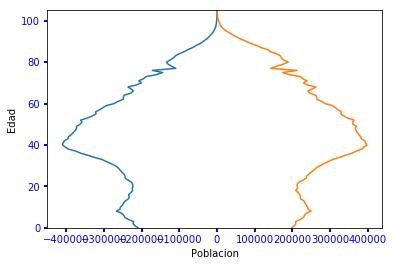

In [42]:
plt.plot(-panda_poblacion['Hombres'],panda_poblacion['Edad'])
plt.plot(panda_poblacion['Mujeres'],panda_poblacion['Edad'])
plt.locator_params(axis='x',nbins=10)
plt.ylim(0,105)
plt.tick_params(colors='b',width='2')
plt.xlabel('Poblacion')
plt.ylabel('Edad')
#plt.xticks([0,10,20,30,40,50,60,70,80,90,100],['0','10','20','30','40','50','60','70','80','90','100'])

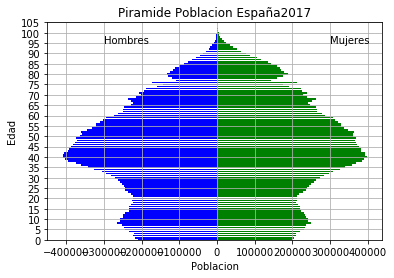

In [43]:
#plt.rcdefaults()
fig,ax = plt.subplots()
y_pos = panda_poblacion['Edad']
poblacion_mujeres = panda_poblacion['Mujeres']
ax.barh(y_pos, poblacion_mujeres, align='center',
        color='green', ecolor='black')
ax.barh(y_pos,-panda_poblacion['Hombres'],align='center',color='blue',ecolor='black')
ax.set_yticks(y_pos)

#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Poblacion')
ax.set_ylabel('Edad')
ax.locator_params(axis='y',nbins=25)
plt.ylim(0,105)
ax.set_title('Piramide Poblacion España2017')
ax.grid(True)
plt.text(300000, 95, 'Mujeres')
plt.text(-300000,95,'Hombres')
plt.show()

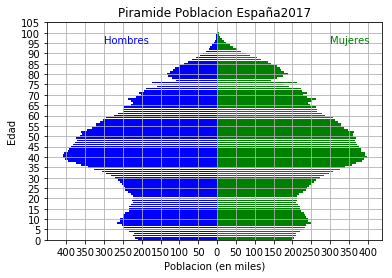

In [47]:
#plt.rcdefaults()
posiciones_x=[-400000,-350000]
etiquetas_x=['400','350']
fig,ax = plt.subplots()
y_pos = panda_poblacion['Edad']
poblacion_mujeres = panda_poblacion['Mujeres']
ax.barh(y_pos, poblacion_mujeres, align='center',
        color='green', ecolor='black')
ax.barh(y_pos,-panda_poblacion['Hombres'],align='center',color='blue',ecolor='black')
ax.set_yticks(y_pos)
ax.set_xticks([-400000,-350000,-300000,-250000,-200000,-150000,-100000,-50000,0,
               50000,100000,150000,200000,250000,300000,350000,400000,])
ax.set_xticklabels(['400','350','300','250','200','150','100','50','0'
                    ,'50','100','150','200','250','300','350','400'])
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Poblacion (en miles)')
ax.set_ylabel('Edad')
ax.locator_params(axis='y',nbins=25)
plt.ylim(0,105)
ax.set_title('Piramide Poblacion España2017')
ax.grid(True)
plt.text(300000, 95, 'Mujeres',color='green')
plt.text(-300000,95,'Hombres',color='blue')
plt.show()